### 전국어린이보호구역표준데이터
- 시설종류별 CCTV 설치 여부 카운트 / 대수
- 광역시도별, 시설종류별 카운트
- 관할경찰서별 CCTV 대수
- CCTV 평균 설치대수
- 도로폭/CCTV 설치대수 상관도

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd_rawdata = pd.read_csv('전국어린이보호구역표준데이터.csv', encoding='cp949')

column_selection = ['시설종류', '관할경찰서명', 'CCTV설치여부', 'CCTV설치대수', '제공기관명', '보호구역도로폭']
pd_data = pd_rawdata[column_selection]
del pd_rawdata
# print(pd_rawdata[:3])

In [2]:
# EDA : Exploratory Data Analysis
# print(pd_data.columns)
# print(pd_data.dtypes)
pd_data['시설종류'] = pd_data['시설종류'].astype('category')
pd_data['CCTV설치여부'] = pd_data['CCTV설치여부'].astype('category')
# print(pd_data.dtypes)

In [3]:
# 결측치 확인
# print(pd_data.shape)
# pd_data.describe(include='all')
for e in pd_data:
    print(e, pd_data[e].hasnans)
    if pd_data[e].hasnans == True:
        print(pd_data[e].isna().value_counts())

시설종류 False
관할경찰서명 False
CCTV설치여부 False
CCTV설치대수 True
False    11682
True      3374
Name: CCTV설치대수, dtype: int64
제공기관명 False
보호구역도로폭 True
False    10684
True      4372
Name: 보호구역도로폭, dtype: int64


In [20]:
#CCTV 설치대수: 결측치 처리
#CCTV 설치여부: Y --> 1
#CCTV 설치여부: N --> 0
print(pd_data['CCTV설치대수'].isna().value_counts())
filter_y = pd_data['CCTV설치여부'] == 'Y'
filter_n = pd_data['CCTV설치여부'] == 'N'
pd_data.loc[filter_y, 'CCTV설치대수'] = pd_data.loc[filter_y, 'CCTV설치대수'].replace(np.NaN,1)
pd_data.loc[filter_n, 'CCTV설치대수'] = pd_data.loc[filter_n, 'CCTV설치대수'].replace(np.NaN,1)

# pd_data.replace({'CCTV설치여부':'Y', 'CCTV설치대수':np.NaN}, 1, inplace=True)
# pd_data.replace({'CCTV설치여부':'N', 'CCTV설치대수':np.NaN}, 0, inplace=True)
print(pd_data['CCTV설치대수'].isna().value_counts())

False    15056
Name: CCTV설치대수, dtype: int64
False    15056
Name: CCTV설치대수, dtype: int64


In [5]:
def myfn1(x):
    if type(x) == type(' '):
        if '~' in x:
            m = np.array(x.split('~')).astype(np.float64).mean()
            return str(m)
        return str(x)
#도로폭: 오류치 처리
#숫자a~숫자b 형태의 문자열 --> '숫자a'와 '숫자b'의 평균치(np.float64) 값으로 대체
# print(pd_data['보호구역도로폭'].value_counts())
y = pd_data['보호구역도로폭'].apply(myfn1)
# print(pd_data['보호구역도로폭'].value_counts())
# print(y.value_counts())

#도로폭: 결측치 처리
#전체 도로폭 평균치로 대체
print(pd_data['보호구역도로폭'].isna().value_counts())
y = y.astype(np.float64)
y = y.replace(np.NaN, y.mean())
print(y.isna().value_counts())
pd_data['보호구역도로폭'] = y

False    10684
True      4372
Name: 보호구역도로폭, dtype: int64
False    15056
Name: 보호구역도로폭, dtype: int64


In [6]:
for e in pd_data:
    print(e, pd_data[e].hasnans)
    if pd_data[e].hasnans == True:
        print(pd_data[e].isna().value_counts())

시설종류 False
관할경찰서명 False
CCTV설치여부 False
CCTV설치대수 False
제공기관명 False
보호구역도로폭 False


### 전국어린이보호구역표준데이터
- 시설종류별 CCTV 설치 여부 카운트 / 대수
- 광역시도별, 시설종류별 카운트
- 관할경찰서별 CCTV 대수
- CCTV 평균 설치대수
- 도로폭/CCTV 설치대수 상관도

In [7]:
# print(pd_data)
# print(pd_data['보호구역도로폭'].value_counts())
g1 = pd_data.groupby('시설종류')
#print(g1)
#g1.count()
#g1.sum()
#g1['CCTV설치대수'].sum()

In [8]:
g2 = pd_data.groupby(['제공기관명','시설종류'])
g2.count()

관할경찰서명  CCTV설치여부  CCTV설치대수  보호구역도로폭
제공기관명    시설종류                                          
강원도 강릉시  국제학교            0         0         0        0
         대안학교            0         0         0        0
         어린이집            6         6         6        6
         외국인교육기관         0         0         0        0
         외국인학교           0         0         0        0
...                    ...       ...       ...      ...
충청북도 충주시 유치원            44        44        44       44
         초등학교           38        38        38       38
         초등학교+어린이집       0         0         0        0
         특수학교            3         3         3        3
         학원              0         0         0        0

[2250 rows x 4 columns]

In [9]:
pd_data['CCTV설치대수'].mean()

2.2310042507970245

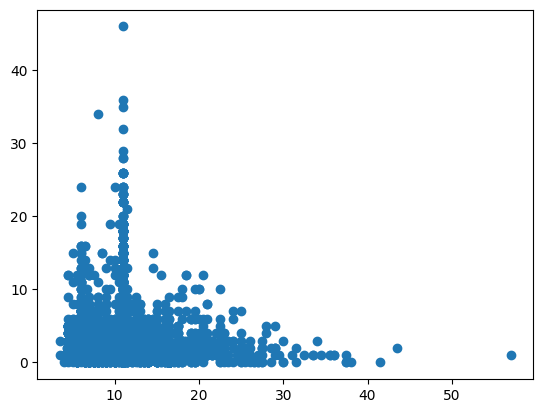

In [13]:
x = pd_data['보호구역도로폭']
y = pd_data['CCTV설치대수']
np.corrcoef(x,y)
_, axe = plt.subplots()
axe.scatter(x,y)

In [ ]:
# 조건 1개: column a의 값이 1
# 교체대상 column b의 값
df_t = pd.DataFrame({'a':[1,1,2,2], 'b':[5,6,5,6]})
print(df_t)
f1 = df_t['a']==1 # column a의 값이 1인것만 필터
print('*****')
print(df_t.loc[f1,'b']) 
df_t.loc[f1,'b'] = 100
print('*****')
print(df_t)

In [19]:
# 조건 2개: column a의 값이 1, column b의 값이 6
# 교체 대상: column b의 값.
df_t = pd.DataFrame({'a':[1,1,2,2], 'b':[5,6,5,6]})
print(df_t)
f1 = df_t['a']==1
print('*****')
print(df_t.loc[f1,'b'])
df_t.loc[f1,'b'] = df_t.loc[f1,'b'].replace(6, 100)
print('*****')
print(df_t)

   a  b
0  1  5
1  1  6
2  2  5
3  2  6
*****
   a  b
0  1  5
1  1  6
*****
   a    b
0  1    5
1  1  100
2  2    5
3  2    6


### 시설종류
* dtype: category
* value:
* 결측치 없음

### 관할경찰서명
* dtype: object
* 결측치 없음

### CCTV 설치여부
* dtype: category
* value: 'Y','N'
* 결측치 없음

### CCTV 설치대수
* dtype: np.int64
* min / max: 0 / _
* 결측치 (개)

    CCTV 설치여부: 'Y' --> 1
    
    CCTV 설치여부: 'N' --> 0

### 보호구역도로폭
* dtype: np.float64
* min / max: 
* 오류치 (개, 처리후 오류치 없음)

     숫자a~숫자b 형태의 문자열 --> '숫자a'와 '숫자b'의 평균치(np.float64) 값으로 대체
     
* 결측치 (개, 처리후 오류치 없음)

    전체 평균값으로 대체
    


In [11]:
# !pip install scikit-learn
# !pip install datasets

In [12]:
# import sklearn
# from sklearn import datasets

# x = datasets.load_diabetes()
# print(x['DESCR'])